# Medical Imaging Reconstruction

In this problem, you will consider an example resembles medical imaging reconstruction in MRI. We
begin with a true image image of dimension 50 × 50 (i.e., there are 2500 pixels in total). Data is
cs.mat; you can plot it first. This image is truly sparse, in the sense that 2084 of its pixels have a value
of 0, while 416 pixels have a value of 1. You can think of this image as a toy version of an MRI image
that we are interested in collecting.
Because of the nature of the machine that collects the MRI image, it takes a long time to measure each
pixel value individually, but it’s faster to measure a linear combination of pixel values. We measure
n = 1300 linear combinations, with the weights in the linear combination being random, in fact,
independently distributed as N (0, 1). Because the machine is not perfect, we don’t get to observe this
directly, but we observe a noisy version. These measurements are given by the entries of the vector
y = Ax + n,
where y ∈ R
1300
, A ∈ R
1300×2500, and n ∼ N (0, 25 × I1300) where In denotes the identity matrix of
size n × n. In this homework, you can generate the data y using this model.
Now the question is: can we model y as a linear combination of the columns of x to recover some
coefficient vector that is close to the image? Roughly speaking, the answer is yes.
Key points here: although the number of measurements n = 1300 is smaller than the dimension p
= 2500, the true image is sparse. Thus we can recover the sparse image using few measurements
exploiting its structure. This is the idea behind the field of compressed sensing.
The image recovery can be done using lasso
min
x
ky − Axk
2
2 + λkxk1

**(a) Now use lasso to recover the image and select λ using 10-fold cross-validation. Plot the
cross-validation error curves, and show the recovered image.**


Text(0.5, 1.0, 'Original')

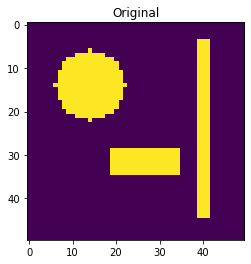

In [95]:
#y = ax + n

img = loadmat('data/cs.mat')['img']
warnings.filterwarnings('ignore')
plt.imshow(img)
plt.title("Original")

In [ ]:
img = img.reshape(2500,)
img.shape


A = np.random.normal(0, 1, (1300,2500))
A.shape

N = np.random.normal(0,5, (1300,))
N.shape

y = A@img + N
y.shape

In [66]:
start = time.time()

lasso = Lasso(normalize = True)
modelgrid = GridSearchCV(estimator=lasso, param_grid={'alpha':np.arange(0.01,1,0.05)}, cv=10, scoring='neg_mean_squared_error')

# print(f"Intercept: {model_grid}")
modelgrid.fit(A,y)

print(f"Best Parameter: {modelgrid.best_params_}")
print(f"Best MSE: {modelgrid.best_score_}")
print(f"Best Residual Sum of squares: {modelgrid.best_score_ * len(A)}")
print(f"took {time.time() - start} seconds")

Best Parameter: {'alpha': 0.01}
Best MSE: -262.9274672936496
Best Residual Sum of squares: -341805.7074817445
took 21.1069438457489 seconds


In [69]:
best = Lasso(normalize = True, alpha = modelgrid.best_params_['alpha']).fit(A,y)
print(f"Best Ridge Model Intercept: {best.intercept_}")
print(f"Best Ridge Model Coefficients: {best.coef_}")

Best Ridge Model Intercept: -0.17877817200626864
Best Ridge Model Coefficients: [-0.07805544  0.         -0.         ...  0.         -0.
  0.        ]


Text(0.5, 1.0, 'CV Curve')

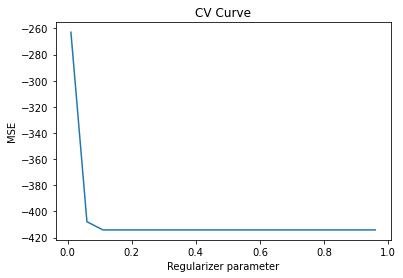

In [67]:
plt.plot(modelgrid.cv_results_['param_alpha'], modelgrid.cv_results_['mean_test_score'])
plt.xlabel('Regularizer parameter')
plt.ylabel('MSE')
plt.title("CV Curve")

In [70]:
recon = best.coef_.reshape(50,50)
recon

array([[-0.07805544,  0.        , -0.        , ...,  0.2685734 ,
         0.        ,  0.        ],
       [ 0.        , -0.        ,  0.        , ..., -0.01259687,
        -0.        , -0.        ],
       [ 0.        ,  0.        , -0.        , ...,  0.        ,
        -0.        ,  0.        ],
       ...,
       [-0.        ,  0.        ,  0.        , ..., -0.45723311,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        ,  0.        ],
       [ 0.08275193,  0.        ,  0.        , ...,  0.        ,
        -0.        ,  0.        ]])

<Figure size 57600x57600 with 0 Axes>

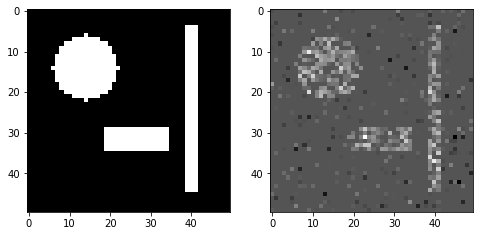

In [74]:
plt.figure(figsize = (800,800))
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (8,8))
ax = axes.ravel()

ax[0].imshow(np.reshape(img, (50, 50)), cmap='gray')
ax[1].imshow(recon, cmap='gray')

**(b)  To compare, also use ridge regression to recover the image. Select λ using 10-fold cross-validation. Plot the cross-validation error curves, and show the recovered image. Which approaches give a better recovered image?**

In [96]:
start = time.time()

ridge = Ridge(normalize = True)
modelgrid2 = GridSearchCV(estimator=ridge, param_grid={'alpha':np.arange(0,1,0.05)}, cv=10, scoring='neg_mean_squared_error')

# print(f"Intercept: {model_grid}")
modelgrid2.fit(A,y)

print(f"Best Parameter: {modelgrid2.best_params_}")
print(f"Best MSE: {modelgrid2.best_score_}")
print(f"Best Residual Sum of squares: {modelgrid2.best_score_ * len(A)}")

print(f"took {time.time() - start} seconds")

Best Parameter: {'alpha': 0.25}
Best MSE: -266.2406148141612
Best Residual Sum of squares: -346112.79925840953
took 55.50411295890808 seconds


In [77]:
best2 = Ridge(normalize = True, alpha = modelgrid2.best_params_['alpha']).fit(A,y)
print(f"Best Ridge Model Intercept: {best.intercept_}")
print(f"Best Ridge Model Coefficients: {best.coef_}")

Best Ridge Model Intercept: -0.17877817200626864
Best Ridge Model Coefficients: [-0.07805544  0.         -0.         ...  0.         -0.
  0.        ]


Text(0.5, 1.0, 'CV Curve')

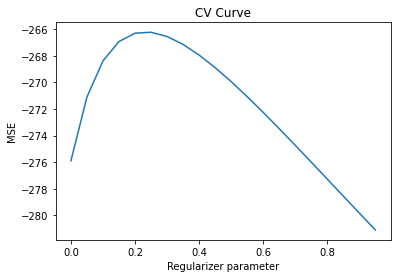

In [78]:
plt.plot(modelgrid2.cv_results_['param_alpha'], modelgrid2.cv_results_['mean_test_score'])
plt.xlabel('Regularizer parameter')
plt.ylabel('MSE')
plt.title("CV Curve")

In [79]:
recon2 = best2.coef_.reshape(50,50)
# recon2

array([[-0.20436057,  0.00682494, -0.05781044, ...,  0.42993929,
         0.03071006,  0.03299481],
       [ 0.26005468,  0.03705501,  0.13393454, ..., -0.325474  ,
         0.09083707, -0.19351249],
       [ 0.29471838, -0.07272518, -0.17938607, ...,  0.22526235,
        -0.18933968,  0.16451164],
       ...,
       [ 0.06954331,  0.06899075,  0.05715165, ..., -0.40751195,
        -0.16497591, -0.17434521],
       [ 0.05796942, -0.18536789,  0.12089658, ..., -0.15754271,
        -0.1082593 ,  0.0795474 ],
       [ 0.33282044, -0.05560138,  0.00189091, ...,  0.01452361,
        -0.1212569 ,  0.16973676]])

Text(0.5, 1.0, 'Ridge')

<Figure size 57600x57600 with 0 Axes>

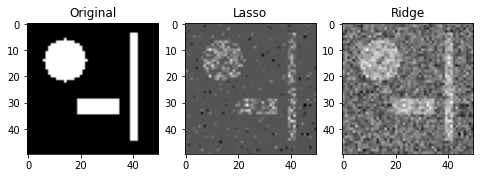

In [88]:
plt.figure(figsize = (800,800))
fig, axes = plt.subplots(nrows = 1, ncols=3, figsize = (8,8))
ax = axes.ravel()

ax[0].imshow(np.reshape(img, (50, 50)), cmap='gray')
ax[1].imshow(recon, cmap='gray')
ax[2].imshow(recon2, cmap='gray')

ax[0].set_title("Original")
ax[1].set_title("Lasso")
ax[2].set_title("Ridge")

The Lasso reconstruction is the best reconstruciton, as we can see that it eliminates the most noise.